In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
N_POP = 50
N_GEN = 5

N_DIM = 2

F = 0.42
CR = 0.5 # Cross-over Ratio

random_shift = 2*np.random.random((N_DIM))
print (random_shift)

[1.86825009 0.28317033]


In [14]:
def loss(x):
    n_dim = x.shape[0]
    
    # Sphere
    y = np.sum((random_shift + x)**2)
    return y


def generate_random_point(n_dim=N_DIM, lim=10):
    pt = (2*np.random.random((n_dim,))-1)*lim
    return pt

pop = [generate_random_point() for ix in range(N_POP)]
temp = []
losses = []

Best loss: 4.558684070014161
Best loss: 0.36555685798660886
Best loss: 0.3264993448289609
Best loss: 0.19851578741313142
Best loss: 0.0192797830185785


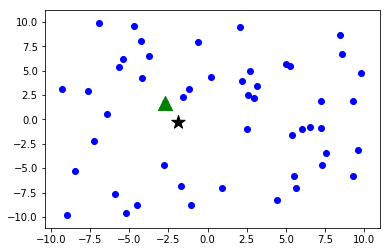

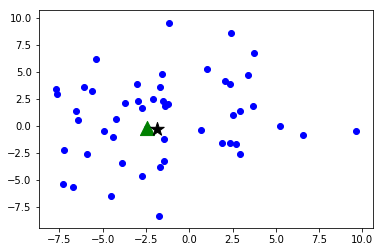

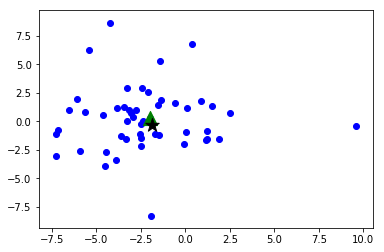

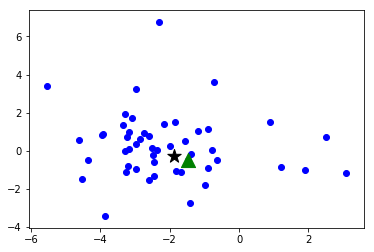

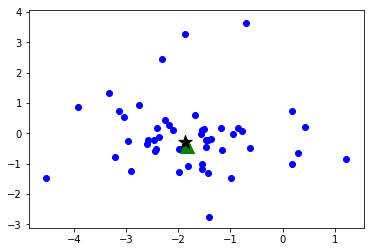

In [15]:
for gen in range(N_GEN):
#     ord_pop = sorted(pop, key=lambda x: loss(x))
    ord_pop = sorted(pop, key=loss)
    
    best = ord_pop[0]
    print ("Best loss:", loss(best))# , best)
    losses.append(loss(best))
    
    plt.figure(gen)
    for ix in ord_pop:
        plt.scatter(ix[0], ix[1], color='blue')
    plt.scatter(best[0], best[1], color='green', marker='^', s=200)
    plt.scatter(-random_shift[0], -random_shift[1], color='black', marker='*', s=200)
#     plt.xlim(-10,10)
    
    for ix in range(N_POP):
        x = pop[ix]
        a, b, c = random.sample(pop, 3)
        while (list(a) == list(x)) or (list(b) == list(x)) or (list(c) == list(x)):
            a, b, c = random.sample(pop, 3)
        
        t = best + F*(x-c)#a + F*(b-c)#
#         print (t)
        
        R = int(np.random.random() * N_DIM)
        y = np.copy(x)
        
        for j in range(N_DIM):
            if (np.random.random() < CR) or (j==R):
                y[j] = t[j]
            else:
                y[j] = x[j]
        
        if loss(y) < loss(x):
            pop[ix] = y
        else:
            pass
plt.show()

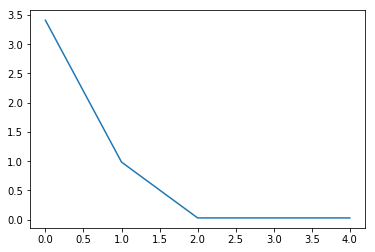

In [12]:
plt.plot(losses)
plt.show()